## SampleSheet.py

https://github.com/YamamotoLabUCSF/SampleSheet  
v1.0/Committed 08-01-2019

<img src="SampleSheet_img/SampleSheet_thumbnail-01.png" align="left" width="600">

### Background:
Sequencing by synthesis (SBS) collects millions to billions of DNA sequence reads *en masse*. DNA templates from tens to thousands of independent sample sources can be barcoded, pooled, and sequenced on a common flow cell. Unique indices (barcodes) allow pooled reads to be re-assigned to cognate sample sources (demultiplexed).

**This script automates creation of an Illumina® Sample Sheet, the comma-separated text document required by Illumina® sequencing systems to specify (1) sequencing parameters and (2) sample-barcode relationships.** With this script, a Sample Sheet with up to 9,216 sample-barcode relationships can be automatically generated in <1 second, following user entry of a single list containing up to 96 sample prefixes assigned to an i7 index range and unique i5 index (each sample prefix to be expanded to up to 96 individual samples, suffixed by well ID (*i.e.*, A01-H12) of a 96-well plate).

### Synopsis:
**This script returns a Sample Sheet file compatible with Illumina® sequencing platforms.**  

**Its barcode assignments depend on a set of 192 primers with unique 8-bp barcodes compatible with Illumina® sequencing platforms; these barcodes allow up to 9,216 samples to be arrayed in 96-well (or 384-well) format with unique barcodes for pooled sequencing.**

**Users are asked for the path to an output directory in which a Sample Sheet will be created, along with user-specific variables for Sample Sheet \[Header\], \[Reads\], and \[Data\] sections.**
>(see 'Input notes' for details).
    
Python3 is required for operation.  

Note on index usage: In this script, i7 is designated for use in full plate format (each well is uniquely barcoded by a single i7 index), whereas i5 defines all wells of a specific plate (up to 96 wells in a single plate are barcoded by a common i5 index).

For usage details, please refer to README file at GitHub and to the following manuscript:  
>*Ehmsen, Knuesel, Stenglein, Martinez, Asahina, Aridomi, DeRisi, Yamamoto (2019)*
    
Please cite usage as:  
>ImputedGenotypes.py  
>*Ehmsen, Knuesel, Stenglein, Martinez, Asahina, Aridomi, DeRisi, Yamamoto (2019)*
 
--------

### Operation notes:
*What does this script do?*

This script automates creation of a Sample Sheet compatible with Illumina® sequencing, based on custom i7 (96) and i5 (96) index sequences used to barcode up to 9,216 distinct samples. Specifically, the script performs these operations:

 1. **collect user input**
    - specify Dual Indexed Sequencing Workflow (A *vs.* B)
    - specify Investigator Name, Project Name
    - specify single index (SE) *vs.* dual-indexed (PE) barcode format
    - collect Data relationships (sample ID, i7 barcode range (1-96) and single i5 barcode (1-96)  
 
 
 2. **generate Sample Sheet**
    - populate \[Header\] and \[Reads\] sections based on user input for Investigator Name, Project Name, SE/PE format
    - populate \[Data\] section based on expansion of i7 barcode range and i5 barcode designation for each 96-well plate  
    (appropriate i7 and i5 index sequences are populated based on user-specified Workflow (A *vs.* B))

### Input notes:
You will be prompted for the following user-specific information:

**Required** (4 strings): 
      <ul>
      <li>where should output file go?</li>
          *absolute path to **output directory** and filename for Sample Sheet*
      <li>Investigator Name</li>
          *character string specifying name to be associated with Sample Sheet and sequencing run*         
      <li>Project Name</li>
          *character string specifying project name to be associated with Sample Sheet and sequencing run*
      <li>Run type specification: Single-end (SE) or Paired-end (PE) sequencing run?  How many sequencing cycles (read length for R1 (Read 1) and R2 (Read 2))?
          *...comma-separated character string indicating SE vs. PE, # of sequencing cycles (R1), # of sequencing cycles (R2, if applicable)*
      <li>List of sample:barcode relationships</li>
          *single lines of comma-separated character strings specifying overarching sample prefix to assign to up to 96 samples arrayed in 96-well plate format (prefix is parsed to samples with well suffixes, e.g., -A01, -A02...-H12); barcode assignments (i7 and i5) are designated to individual samples based on integer range (i7) or integer (i5) assigned to plate*
      </ul>
  
Note on list of sample:barcode relationships: This is a list of plate names (prefixes), i7 index range, and i5 index.  
For example: 'DG-1, 1-96, 5' on a single line of text would indicate plate name/prefix 'DG-1' applied to up to 96 samples (uniqued identified by well position A01-H12, *e.g.*, DG-1-A01, DG-1-A02, ... DG-1-H12), range of i7 indices used to barcode individual wells in this 96-well plate (*e.g.*, A01-H12), and i5 index used across all wells of this plate (*e.g.*, A05).

### Output notes:
In brief: Illumina® Sample Sheets accommodate up to 10 column fields, but only 5 of these (fields 2, 5-8) are required for a sequencing run (indicated below).  This script outputs only these 5 required column fields.  
 
10 Sample Sheet column fields:  
  - field 1: Sample_ID,  
  - field 2: Sample_Name,  
  - field 3: Sample_Plate,  
  - field 4: Sample_Well,  
  - field 5: I7_Index_ID, 
  - field 6: index,  
  - field 7: I5_Index_ID,  
  - field 8: index2, 
  - field 9: Sample_Project,  
  - field 10: Description  

Fields customized and output by this script:  
  - field 2: Sample_Name,  
  - field 5: I7_Index_ID, 
  - field 6: I7 index sequence,  
  - field 7: I5_Index_ID,  
  - field 8: I5 index sequence  
 
--------
### Visual summary of key script operations:
In short, **brief user inputs** (*e.g.,* below), are converted to **Sample Sheet** contents compatible with Illumina® sequencing (**key output file**, below). In particular, a minimal list of up to 96 \[Data\] relationships is expanded in microseconds to a \[Data\] section containing up to 9,216 sample:barcode relationships.  
  
*example*  

------
**input:**  
*Path to Sample Sheet file name for creation:* /Users/name/SampleSheet.csv  
*Workflow:* A  
*Investigator Name, Project Name*: Dorothy Gale, Sequencing  
*SE vs. PE, cycle details*: PE, 151, 151  
*sample:barcoded relationships:*  
DG-1, 1-96, 4  
DG-2, 1-96, 9  
DG-2, 1-96, 78  
<br clear="all" />
**output:**
<br clear="all" />
<img src="SampleSheet_img/SampleSheet_example.png" align="mid" width="500">  
<div style=text-align:center>...etc.</div>

-------------------------------------------------------------------------------
**Welcome.**  
    

### I. Setup  
Import libraries, modules

In [1]:
# Operating system interfaces
import os

# System-specific parameters and functions
import sys

# Implementation of import
import importlib

# Time access and conversions, Basic data and time types
import time
from datetime import datetime

# IPython module: display
from IPython.display import Image

In [2]:
# Log start time
initialTime = datetime.now()

Define lists and dictionaries that establish integer (1-96) and wellID (A01-H12), and wellID and barcode relationships.

In [3]:
# Define 3 lists and 4 dictionaries that this script will use to establish relationships between well_ID number (1-96) and well_ID label (A01-H12) [well_ID_list], between well_ID number (1-96) and index name (i5A01-i5H12 or i7A01-i7H12) [i5_well_IDs and i7_well_IDs], and between index name (i5A01-i5H12 or i7A01-i7H12) and index sequence (8-bp unique sequence) [i5Dict and i7Dict, i5_revcomp_Dict, i7_revcomp_Dict]:

well_ID_list = [
('1','A01'),
('2','A02'),
('3','A03'),
('4','A04'),
('5','A05'),
('6','A06'),
('7','A07'),
('8','A08'),
('9','A09'),
('10','A10'),
('11','A11'),
('12','A12'),
('13','B01'),
('14','B02'),
('15','B03'),
('16','B04'),
('17','B05'),
('18','B06'),
('19','B07'),
('20','B08'),
('21','B09'),
('22','B10'),
('23','B11'),
('24','B12'),
('25','C01'),
('26','C02'),
('27','C03'),
('28','C04'),
('29','C05'),
('30','C06'),
('31','C07'),
('32','C08'),
('33','C09'),
('34','C10'),
('35','C11'),
('36','C12'),
('37','D01'),
('38','D02'),
('39','D03'),
('40','D04'),
('41','D05'),
('42','D06'),
('43','D07'),
('44','D08'),
('45','D09'),
('46','D10'),
('47','D11'),
('48','D12'),
('49','E01'),
('50','E02'),
('51','E03'),
('52','E04'),
('53','E05'),
('54','E06'),
('55','E07'),
('56','E08'),
('57','E09'),
('58','E10'),
('59','E11'),
('60','E12'),
('61','F01'),
('62','F02'),
('63','F03'),
('64','F04'),
('65','F05'),
('66','F06'),
('67','F07'),
('68','F08'),
('69','F09'),
('70','F10'),
('71','F11'),
('72','F12'),
('73','G01'),
('74','G02'),
('75','G03'),
('76','G04'),
('77','G05'),
('78','G06'),
('79','G07'),
('80','G08'),
('81','G09'),
('82','G10'),
('83','G11'),
('84','G12'),
('85','H01'),
('86','H02'),
('87','H03'),
('88','H04'),
('89','H05'),
('90','H06'),
('91','H07'),
('92','H08'),
('93','H09'),
('94','H10'),
('95','H11'),
('96','H12')
]

i5_well_IDs = [
('1','i5A01'),
('2','i5A02'),
('3','i5A03'),
('4','i5A04'),
('5','i5A05'),
('6','i5A06'),
('7','i5A07'),
('8','i5A08'),
('9','i5A09'),
('10','i5A10'),
('11','i5A11'),
('12','i5A12'),
('13','i5B01'),
('14','i5B02'),
('15','i5B03'),
('16','i5B04'),
('17','i5B05'),
('18','i5B06'),
('19','i5B07'),
('20','i5B08'),
('21','i5B09'),
('22','i5B10'),
('23','i5B11'),
('24','i5B12'),
('25','i5C01'),
('26','i5C02'),
('27','i5C03'),
('28','i5C04'),
('29','i5C05'),
('30','i5C06'),
('31','i5C07'),
('32','i5C08'),
('33','i5C09'),
('34','i5C10'),
('35','i5C11'),
('36','i5C12'),
('37','i5D01'),
('38','i5D02'),
('39','i5D03'),
('40','i5D04'),
('41','i5D05'),
('42','i5D06'),
('43','i5D07'),
('44','i5D08'),
('45','i5D09'),
('46','i5D10'),
('47','i5D11'),
('48','i5D12'),
('49','i5E01'),
('50','i5E02'),
('51','i5E03'),
('52','i5E04'),
('53','i5E05'),
('54','i5E06'),
('55','i5E07'),
('56','i5E08'),
('57','i5E09'),
('58','i5E10'),
('59','i5E11'),
('60','i5E12'),
('61','i5F01'),
('62','i5F02'),
('63','i5F03'),
('64','i5F04'),
('65','i5F05'),
('66','i5F06'),
('67','i5F07'),
('68','i5F08'),
('69','i5F09'),
('70','i5F10'),
('71','i5F11'),
('72','i5F12'),
('73','i5G01'),
('74','i5G02'),
('75','i5G03'),
('76','i5G04'),
('77','i5G05'),
('78','i5G06'),
('79','i5G07'),
('80','i5G08'),
('81','i5G09'),
('82','i5G10'),
('83','i5G11'),
('84','i5G12'),
('85','i5H01'),
('86','i5H02'),
('87','i5H03'),
('88','i5H04'),
('89','i5H05'),
('90','i5H06'),
('91','i5H07'),
('92','i5H08'),
('93','i5H09'),
('94','i5H10'),
('95','i5H11'),
('96','i5H12')
]

i7_well_IDs = [
('1','i7A01'),
('2','i7A02'),
('3','i7A03'),
('4','i7A04'),
('5','i7A05'),
('6','i7A06'),
('7','i7A07'),
('8','i7A08'),
('9','i7A09'),
('10','i7A10'),
('11','i7A11'),
('12','i7A12'),
('13','i7B01'),
('14','i7B02'),
('15','i7B03'),
('16','i7B04'),
('17','i7B05'),
('18','i7B06'),
('19','i7B07'),
('20','i7B08'),
('21','i7B09'),
('22','i7B10'),
('23','i7B11'),
('24','i7B12'),
('25','i7C01'),
('26','i7C02'),
('27','i7C03'),
('28','i7C04'),
('29','i7C05'),
('30','i7C06'),
('31','i7C07'),
('32','i7C08'),
('33','i7C09'),
('34','i7C10'),
('35','i7C11'),
('36','i7C12'),
('37','i7D01'),
('38','i7D02'),
('39','i7D03'),
('40','i7D04'),
('41','i7D05'),
('42','i7D06'),
('43','i7D07'),
('44','i7D08'),
('45','i7D09'),
('46','i7D10'),
('47','i7D11'),
('48','i7D12'),
('49','i7E01'),
('50','i7E02'),
('51','i7E03'),
('52','i7E04'),
('53','i7E05'),
('54','i7E06'),
('55','i7E07'),
('56','i7E08'),
('57','i7E09'),
('58','i7E10'),
('59','i7E11'),
('60','i7E12'),
('61','i7F01'),
('62','i7F02'),
('63','i7F03'),
('64','i7F04'),
('65','i7F05'),
('66','i7F06'),
('67','i7F07'),
('68','i7F08'),
('69','i7F09'),
('70','i7F10'),
('71','i7F11'),
('72','i7F12'),
('73','i7G01'),
('74','i7G02'),
('75','i7G03'),
('76','i7G04'),
('77','i7G05'),
('78','i7G06'),
('79','i7G07'),
('80','i7G08'),
('81','i7G09'),
('82','i7G10'),
('83','i7G11'),
('84','i7G12'),
('85','i7H01'),
('86','i7H02'),
('87','i7H03'),
('88','i7H04'),
('89','i7H05'),
('90','i7H06'),
('91','i7H07'),
('92','i7H08'),
('93','i7H09'),
('94','i7H10'),
('95','i7H11'),
('96','i7H12')
]

i5revcomp_Dict = {
'i5A01':'CTCCATCA',
'i5A02':'CGAATTGA',
'i5A03':'CGTTAAGA',
'i5A04':'AGGAGTGA',
'i5A05':'TCAATCGA',
'i5A06':'AGTACCGA',
'i5A07':'TCGGATTA',
'i5A08':'TTGTGAGA',
'i5A09':'TCTCGAGA',
'i5A10':'CCGGTATA',
'i5A11':'ATCTTGCA',
'i5A12':'CCAACTTA',
'i5B01':'CTAGGATA',
'i5B02':'ACCAGAGA',
'i5B03':'AGGTCAGA',
'i5B04':'ATCGCATA',
'i5B05':'CGCTAGTA',
'i5B06':'TCGATGTA',
'i5B07':'TGAGTAGA',
'i5B08':'AACGCTCA',
'i5B09':'TTCGCTGA',
'i5B10':'ACGTGCTA',
'i5B11':'ATACGCCA',
'i5B12':'AGCAGCTA',
'i5C01':'TGTGAACA',
'i5C02':'ATGCCGTA',
'i5C03':'AGAGCACA',
'i5C04':'CGTCTACA',
'i5C05':'AGGCAACA',
'i5C06':'AAGCGTCA',
'i5C07':'CCTTATCA',
'i5C08':'CGTTGTTA',
'i5C09':'TGACGCTA',
'i5C10':'ACTCATGA',
'i5C11':'TGTGCTTA',
'i5C12':'CACCGTTA',
'i5D01':'CAGTAGGA',
'i5D02':'TGGCATGA',
'i5D03':'CATGATGA',
'i5D04':'ATCCAGGA',
'i5D05':'CAATGACA',
'i5D06':'CGGAATCA',
'i5D07':'TTGGTACA',
'i5D08':'CTACTGTA',
'i5D09':'TCTTCTGA',
'i5D10':'AGTTCGTA',
'i5D11':'ACCTACGA',
'i5D12':'TGAACGGA',
'i5E01':'CAACACTA',
'i5E02':'ATAGAGCA',
'i5E03':'ACATTCCA',
'i5E04':'TGCAACCA',
'i5E05':'TCCTCCTA',
'i5E06':'CTCGTCTA',
'i5E07':'AGAGATGA',
'i5E08':'CCTAAGTA',
'i5E09':'CTGGAAGA',
'i5E10':'TGCCAATA',
'i5E11':'TCTACGCA',
'i5E12':'ACTGTGGA',
'i5F01':'TGATTGCA',
'i5F02':'CTTACGGA',
'i5F03':'CACATGCA',
'i5F04':'TTCAGTCA',
'i5F05':'AAGGACCA',
'i5F06':'TGGTGGTA',
'i5F07':'CTCAGGTA',
'i5F08':'TCGAGACA',
'i5F09':'CCAGAACA',
'i5F10':'TTACACGA',
'i5F11':'CAGACCTA',
'i5F12':'CGCATATA',
'i5G01':'ACTGACTA',
'i5G02':'ACAGGTCA',
'i5G03':'AACACGGA',
'i5G04':'TGTCTGGA',
'i5G05':'CTAGTTCA',
'i5G06':'CTATCCTA',
'i5G07':'CATCAGCA',
'i5G08':'AGTGGATA',
'i5G09':'TCACCATA',
'i5G10':'CGATCTCA',
'i5G11':'AATTGCGA',
'i5G12':'AGTCCTCA',
'i5H01':'TTGACCGA',
'i5H02':'ATGTCTCA',
'i5H03':'AACGTAGA',
'i5H04':'CTTGCACA',
'i5H05':'TTCATGGA',
'i5H06':'CCATGGTA',
'i5H07':'TTAGCGTA',
'i5H08':'CCATTAGA',
'i5H09':'CTAAGCGA',
'i5H10':'TCGTAGCA',
'i5H11':'CAAGTGGA',
'i5H12':'TCCGTTCA'
}

i5Dict = {
'i5A01':'GAGGTAGT',
'i5A02':'GCTTAACT',
'i5A03':'GCAATTCT',
'i5A04':'TCCTCACT',
'i5A05':'AGTTAGCT',
'i5A06':'TCATGGCT',
'i5A07':'AGCCTAAT',
'i5A08':'AACACTCT',
'i5A09':'AGAGCTCT',
'i5A10':'GGCCATAT',
'i5A11':'TAGAACGT',
'i5A12':'GGTTGAAT',
'i5B01':'GATCCTAT',
'i5B02':'TGGTCTCT',
'i5B03':'TCCAGTCT',
'i5B04':'TAGCGTAT',
'i5B05':'GCGATCAT',
'i5B06':'AGCTACAT',
'i5B07':'ACTCATCT',
'i5B08':'TTGCGAGT',
'i5B09':'AAGCGACT',
'i5B10':'TGCACGAT',
'i5B11':'TATGCGGT',
'i5B12':'TCGTCGAT',
'i5C01':'ACACTTGT',
'i5C02':'TACGGCAT',
'i5C03':'TCTCGTGT',
'i5C04':'GCAGATGT',
'i5C05':'TCCGTTGT',
'i5C06':'TTCGCAGT',
'i5C07':'GGAATAGT',
'i5C08':'GCAACAAT',
'i5C09':'ACTGCGAT',
'i5C10':'TGAGTACT',
'i5C11':'ACACGAAT',
'i5C12':'GTGGCAAT',
'i5D01':'GTCATCCT',
'i5D02':'ACCGTACT',
'i5D03':'GTACTACT',
'i5D04':'TAGGTCCT',
'i5D05':'GTTACTGT',
'i5D06':'GCCTTAGT',
'i5D07':'AACCATGT',
'i5D08':'GATGACAT',
'i5D09':'AGAAGACT',
'i5D10':'TCAAGCAT',
'i5D11':'TGGATGCT',
'i5D12':'ACTTGCCT',
'i5E01':'GTTGTGAT',
'i5E02':'TATCTCGT',
'i5E03':'TGTAAGGT',
'i5E04':'ACGTTGGT',
'i5E05':'AGGAGGAT',
'i5E06':'GAGCAGAT',
'i5E07':'TCTCTACT',
'i5E08':'GGATTCAT',
'i5E09':'GACCTTCT',
'i5E10':'ACGGTTAT',
'i5E11':'AGATGCGT',
'i5E12':'TGACACCT',
'i5F01':'ACTAACGT',
'i5F02':'GAATGCCT',
'i5F03':'GTGTACGT',
'i5F04':'AAGTCAGT',
'i5F05':'TTCCTGGT',
'i5F06':'ACCACCAT',
'i5F07':'GAGTCCAT',
'i5F08':'AGCTCTGT',
'i5F09':'GGTCTTGT',
'i5F10':'AATGTGCT',
'i5F11':'GTCTGGAT',
'i5F12':'GCGTATAT',
'i5G01':'TGACTGAT',
'i5G02':'TGTCCAGT',
'i5G03':'TTGTGCCT',
'i5G04':'ACAGACCT',
'i5G05':'GATCAAGT',
'i5G06':'GATAGGAT',
'i5G07':'GTAGTCGT',
'i5G08':'TCACCTAT',
'i5G09':'AGTGGTAT',
'i5G10':'GCTAGAGT',
'i5G11':'TTAACGCT',
'i5G12':'TCAGGAGT',
'i5H01':'AACTGGCT',
'i5H02':'TACAGAGT',
'i5H03':'TTGCATCT',
'i5H04':'GAACGTGT',
'i5H05':'AAGTACCT',
'i5H06':'GGTACCAT',
'i5H07':'AATCGCAT',
'i5H08':'GGTAATCT',
'i5H09':'GATTCGCT',
'i5H10':'AGCATCGT',
'i5H11':'GTTCACCT',
'i5H12':'AGGCAAGT'
}

i7revcomp_Dict = {
'i7A01':'GTACGTCA',
'i7A02':'TGCAGTTA',
'i7A03':'ACTGTGGA',
'i7A04':'GGTTAAGA',
'i7A05':'TCACACTA',
'i7A06':'TAGAGGTA',
'i7A07':'GCGACATA',
'i7A08':'TACATGCA',
'i7A09':'GATGATGA',
'i7A10':'TGTGTGCA',
'i7A11':'TCGCTACA',
'i7A12':'AAGCTAGA',
'i7B01':'TAGGACCA',
'i7B02':'TCGTTGGA',
'i7B03':'GTGTCCTA',
'i7B04':'TCCGTATA',
'i7B05':'TACGCTTA',
'i7B06':'TACAACGA',
'i7B07':'GAAGGAGA',
'i7B08':'AAGCATCA',
'i7B09':'TGAGATCA',
'i7B10':'TCTAGACA',
'i7B11':'TGCTCATA',
'i7B12':'TAACTCCA',
'i7C01':'GACACACA',
'i7C02':'TTGTAGCA',
'i7C03':'GTCTACGA',
'i7C04':'GCATTACA',
'i7C05':'GTTCCATA',
'i7C06':'GAATACCA',
'i7C07':'TCACTTGA',
'i7C08':'ACACAAGA',
'i7C09':'ACTACAGA',
'i7C10':'TCTCAGGA',
'i7C11':'ATCGTGCA',
'i7C12':'TCCACGTA',
'i7D01':'ATCCATGA',
'i7D02':'TTCGCAGA',
'i7D03':'TCGTCTCA',
'i7D04':'ACTTACGA',
'i7D05':'TCGGATTA',
'i7D06':'TTGGTCTA',
'i7D07':'ATAGCGGA',
'i7D08':'TGTAACCA',
'i7D09':'ACAGGCTA',
'i7D10':'AAGTCGCA',
'i7D11':'GAGTTCGA',
'i7D12':'ACTCTTCA',
'i7E01':'AAGACCTA',
'i7E02':'ACCATCCA',
'i7E03':'GAACGGTA',
'i7E04':'TAGTGAGA',
'i7E05':'GTCCAACA',
'i7E06':'TATGGCGA',
'i7E07':'GCTTATCA',
'i7E08':'GTGACTGA',
'i7E09':'ACGTGATA',
'i7E10':'GGTTCTTA',
'i7E11':'GATCAGCA',
'i7E12':'GGACAATA',
'i7F01':'AACTCTGA',
'i7F02':'TGACCTTA',
'i7F03':'GGAAGTGA',
'i7F04':'AAGAAGGA',
'i7F05':'GCAATCTA',
'i7F06':'ACGAGTCA',
'i7F07':'TTATGCCA',
'i7F08':'GCCATAGA',
'i7F09':'TAATCGGA',
'i7F10':'TCTCGTTA',
'i7F11':'GGTCTGTA',
'i7F12':'ATCCGGTA',
'i7G01':'ATGCGACA',
'i7G02':'TGAACGCA',
'i7G03':'TGGTATGA',
'i7G04':'TGGACAGA',
'i7G05':'TTGCAAGA',
'i7G06':'ACTAGGTA',
'i7G07':'TACCGATA',
'i7G08':'ATTGGTGA',
'i7G09':'TTCCTCGA',
'i7G10':'TCATGGTA',
'i7G11':'TATCCACA',
'i7G12':'GACTTGTA',
'i7H01':'ATGGAGTA',
'i7H02':'GTCAGATA',
'i7H03':'GAGCACTA',
'i7H04':'GTCATTCA',
'i7H05':'TCCTAAGA',
'i7H06':'GATGCGTA',
'i7H07':'TGCTTCCA',
'i7H08':'ATGTCAGA',
'i7H09':'GTTGCTCA',
'i7H10':'GATATCCA',
'i7H11':'GTTAGCGA',
'i7H12':'GAGGTACA'
}

i7Dict = {
'i7A01':'TGACGTAC',
'i7A02':'TAACTGCA',
'i7A03':'TCCACAGT',
'i7A04':'TCTTAACC',
'i7A05':'TAGTGTGA',
'i7A06':'TACCTCTA',
'i7A07':'TATGTCGC',
'i7A08':'TGCATGTA',
'i7A09':'TCATCATC',
'i7A10':'TGCACACA',
'i7A11':'TGTAGCGA',
'i7A12':'TCTAGCTT',
'i7B01':'TGGTCCTA',
'i7B02':'TCCAACGA',
'i7B03':'TAGGACAC',
'i7B04':'TATACGGA',
'i7B05':'TAAGCGTA',
'i7B06':'TCGTTGTA',
'i7B07':'TCTCCTTC',
'i7B08':'TGATGCTT',
'i7B09':'TGATCTCA',
'i7B10':'TGTCTAGA',
'i7B11':'TATGAGCA',
'i7B12':'TGGAGTTA',
'i7C01':'TGTGTGTC',
'i7C02':'TGCTACAA',
'i7C03':'TCGTAGAC',
'i7C04':'TGTAATGC',
'i7C05':'TATGGAAC',
'i7C06':'TGGTATTC',
'i7C07':'TCAAGTGA',
'i7C08':'TCTTGTGT',
'i7C09':'TCTGTAGT',
'i7C10':'TCCTGAGA',
'i7C11':'TGCACGAT',
'i7C12':'TACGTGGA',
'i7D01':'TCATGGAT',
'i7D02':'TCTGCGAA',
'i7D03':'TGAGACGA',
'i7D04':'TCGTAAGT',
'i7D05':'TAATCCGA',
'i7D06':'TAGACCAA',
'i7D07':'TCCGCTAT',
'i7D08':'TGGTTACA',
'i7D09':'TAGCCTGT',
'i7D10':'TGCGACTT',
'i7D11':'TCGAACTC',
'i7D12':'TGAAGAGT',
'i7E01':'TAGGTCTT',
'i7E02':'TGGATGGT',
'i7E03':'TACCGTTC',
'i7E04':'TCTCACTA',
'i7E05':'TGTTGGAC',
'i7E06':'TCGCCATA',
'i7E07':'TGATAAGC',
'i7E08':'TCAGTCAC',
'i7E09':'TATCACGT',
'i7E10':'TAAGAACC',
'i7E11':'TGCTGATC',
'i7E12':'TATTGTCC',
'i7F01':'TCAGAGTT',
'i7F02':'TAAGGTCA',
'i7F03':'TCACTTCC',
'i7F04':'TCCTTCTT',
'i7F05':'TAGATTGC',
'i7F06':'TGACTCGT',
'i7F07':'TGGCATAA',
'i7F08':'TCTATGGC',
'i7F09':'TCCGATTA',
'i7F10':'TAACGAGA',
'i7F11':'TACAGACC',
'i7F12':'TACCGGAT',
'i7G01':'TGTCGCAT',
'i7G02':'TGCGTTCA',
'i7G03':'TCATACCA',
'i7G04':'TCTGTCCA',
'i7G05':'TCTTGCAA',
'i7G06':'TACCTAGT',
'i7G07':'TATCGGTA',
'i7G08':'TCACCAAT',
'i7G09':'TCGAGGAA',
'i7G10':'TACCATGA',
'i7G11':'TGTGGATA',
'i7G12':'TACAAGTC',
'i7H01':'TACTCCAT',
'i7H02':'TATCTGAC',
'i7H03':'TAGTGCTC',
'i7H04':'TGAATGAC',
'i7H05':'TCTTAGGA',
'i7H06':'TACGCATC',
'i7H07':'TGGAAGCA',
'i7H08':'TCTGACAT',
'i7H09':'TGAGCAAC',
'i7H10':'TGGATATC',
'i7H11':'TCGCTAAC',
'i7H12':'TGTACCTC'    
}

Define barcode plateview image pairs, which log well ID relationships to barcode sequence (for dual indexed Workflows A & B). 

In [4]:
# Workflow A
plateview_image_list_A = ['img/i7_WorkflowA-01.png', 'img/i5_WorkflowA-01.png']
# Workflow B
plateview_image_list_B = ['img/i7_WorkflowB-01.png','img/i5_WorkflowB-01.png']

### II. Define user-specified variables

A user defines input variables by entering individual lines of text at the Jupyter interface.  

Up to 6 variables will now be defined as inputs (see **'User inputs'** above). 

You will be prompted for the following user-specific information:
   - Illumina® Indexed Sequencing Workflow ('A' or 'B'?)
   - Absolute path to output directory and filename for Sample Sheet
   - Investigator Name
   - Project Name
   - Single-end (SE) or Paired-end (PE) sequencing run?  How many reads?
   - List of sample:barcode relationships


Specify Illumina Indexed Sequencing Workflow ('A' vs. 'B')

In [5]:
# Specify Illumina Indexed Sequencing Workflow ('A' vs. 'B')
workflow = input("""
---------------------------------------------
Illumina® Indexed Sequencing Workflow (A or B)
---------------------------------------------
    
Illumina® Indexed Sequencing for dual-indexed (Paired End) runs uses one of two different Workflows (A or B),
defined by whether (A) both index sequences (i7 and i5) are sequenced by primers that anneal to the 'Read 1' strand,
or (B) i7 index is sequenced by a primer that anneals to the 'Read 1' strand, whereas i5 index is sequenced by a
primer that anneals to the 'Read 2' strand. Awareness of the different Workflows for sequencing the indices is
critical, because Workflow determines whether the 5'->3' index sequence (i5 or i7) is returned as a 'forward'
sequence that reads just like the index sequence as it occurs in indexing primers during library preparation,
or whether the 5'->3' index sequence is returned as a 'reverse complement' relative to the index sequence as it
occurs in indexing primers during library preparation. Fundamentally, Workflow determines the 5'->3' nucleotide
sequences entered for i7 and i5 indices in an Illumina® Sample Sheet, essential for faithful demultiplexing of
samples.
    
As of June 2019, Illumina® sequencing instruments use the two dual-indexed Workflows as follows:
      
    Workflow A: MiSeq, NovaSeq 6000, HiSeq 2500, HiSeq 2000
    -------------------------------------------------------
    --> i7 index sequence is recovered as 'reverse complement' relative to i7 sequence
        as it occurs in primers used for library construction.
    --> i5 index sequence is recovered as it occurs in primers used for library construction.
      
    Workflow B: iSeq100, MiniSeq, NextSeq, HiSeqX, HiSeq 4000, HiSeq 3000
    ---------------------------------------------------------------------
    --> i7 index sequence is recovered as 'reverse complement' relative to i7 sequence
        as it occurs in primers used for library construction.
    --> i5 index sequence is recovered as 'reverse complement' relative to i5 sequence
        as it occurs in primers used for library construction.
      
    Please confirm the Workflow appropriate for your sequencing application.
    
    Note, if your application is strictly single-indexed (Single End run using only i7 indices), choose Workflow 'A'.  
      
    Enter 'A' or 'B' to specify the Workflow, and therefore the index sequence orientations,
    appropriate for your Sample Sheet:  """)

if workflow in ('A', 'B'):
    pass
else:
    while workflow not in ('A', 'B'):
        workflow = input("""
    Type 'A' or 'B', or click on the menu 'Kernel -> Restart' to clear and reset:  """)

print(r"""
PLATEVIEWS showing relationships between integer (1-96), position in a 96-well plate (A01-H12), and 8-bp sequence
(as to be represented in Illumina® Sample Sheet) will now be displayed.""")

input(r"""
Please press 'Enter' to continue: """)


---------------------------------------------
Illumina Indexed Sequencing Workflow (A or B)
---------------------------------------------
    
Illumina Indexed Sequencing for dual-indexed (Paired End) runs uses one of two different Workflows (A or B),
defined by whether (A) both index sequences (i7 and i5) are sequenced by primers that anneal to the 'Read 1' strand,
or (B) i7 index is sequenced by a primer that anneals to the 'Read 1' strand, whereas i5 index is sequenced by a
primer that anneals to the 'Read 2' strand. Awareness of the different Workflows for sequencing the indices is
critical, because Workflow determines whether the 5'->3' index sequence (i5 or i7) is returned as a 'forward'
sequence that reads just like the index sequence as it occurs in indexing primers during library preparation,
or whether the 5'->3' index sequence is returned as a 'reverse complement' relative to the index sequence as it
occurs in indexing primers during library preparation. Fundamentally, Work

''


PLATEVIEWS: correspondence between barcode well ID ('A01'-'H12') and number ('1'-'96')
---------------------------------------------------------------------------------------------------
SampleSheet.py requires entry of i7 and i5 identities in number format ('1'-'96') corresponding to well ID,
making a console plateview potentially useful.

WORKFLOW A.  A console view of 8-bp barcode sequences (indices) will now be displayed.

Press 'Enter' to display i7 PLATEVIEW
    
PLATEVIEW:  Barcode sequences, i7  (5'->3')

Please note, each 8-bp barcode sequence displayed in this image is the sequence to be used in a Workflow A
Sample Sheet barcode field. The displayed sequence is the reverse complement of the barcode sequence as it
occurs in the i7 primer.



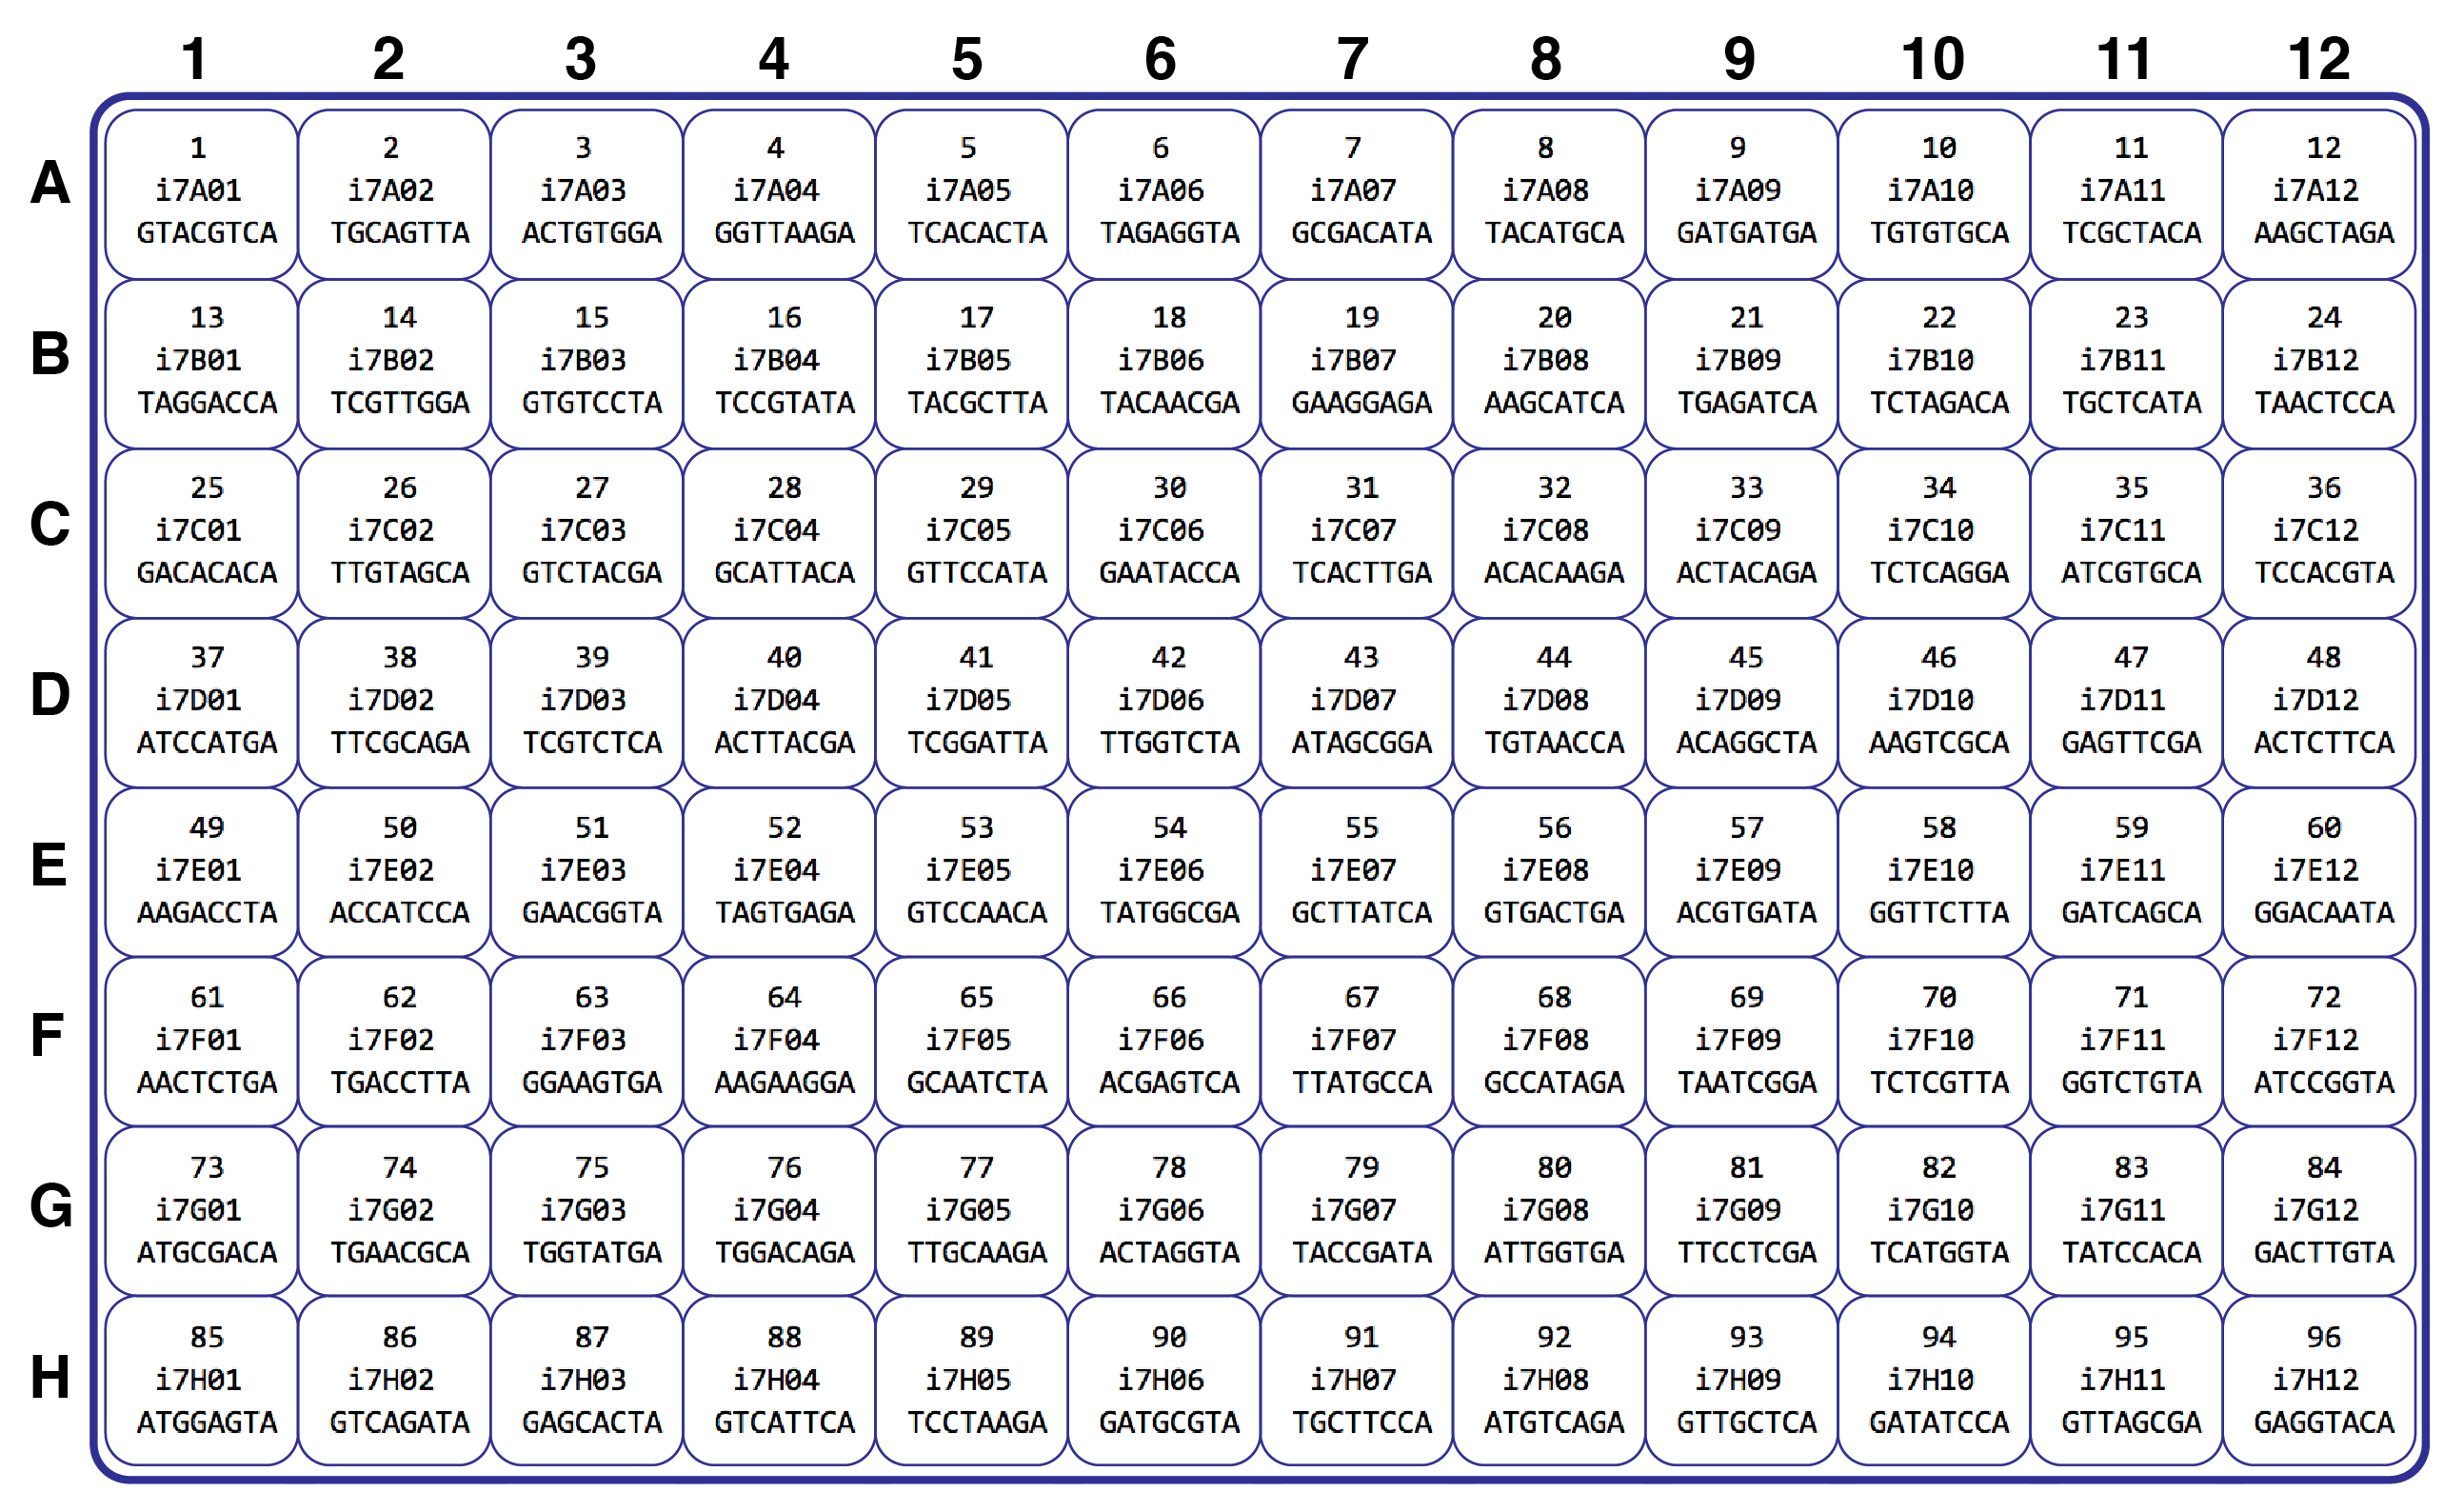

Press 'Enter' to display i5 PLATEVIEW

PLATEVIEW:  Barcode sequences, i5  (5'->3')

Please note, each 8-bp barcode sequence as displayed in this table is the sequence to be used in a Workflow A
Sample Sheet barcode field. The displayed sequence is identical to the barcode sequence as it occurs in the
i5 primer.



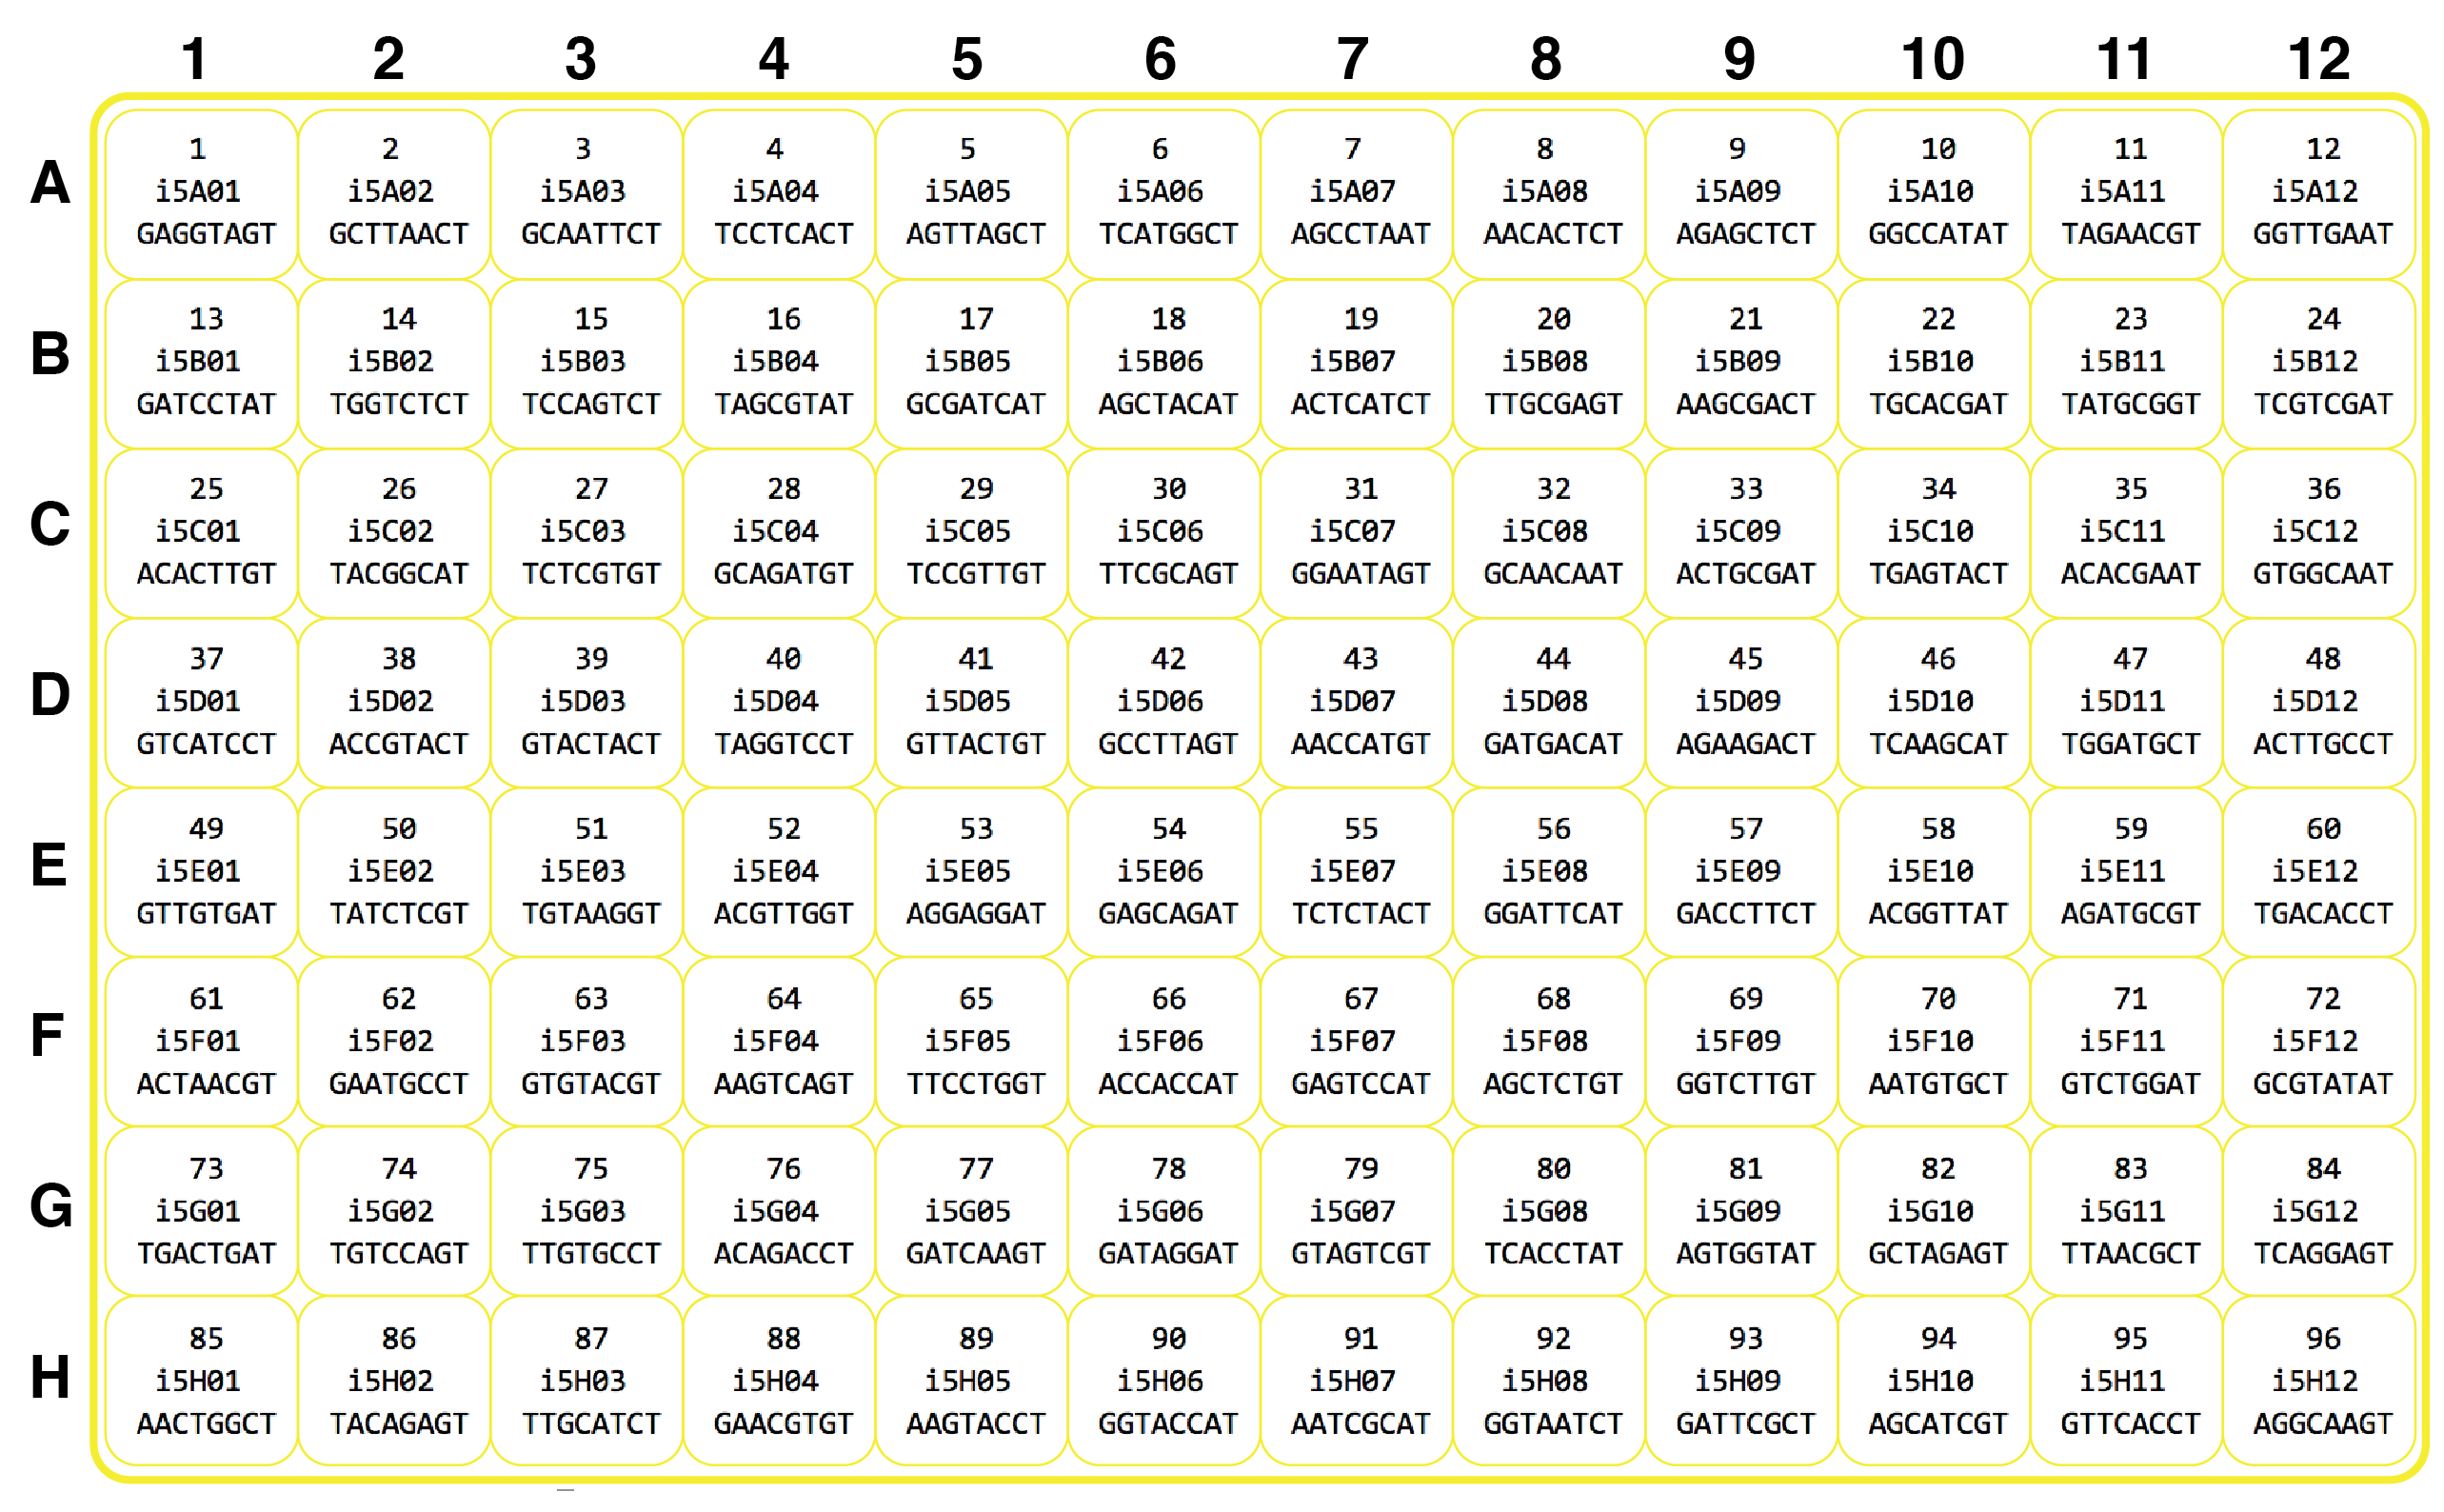

In [6]:
print("""
PLATEVIEWS: correspondence between barcode well ID ('A01'-'H12') and number ('1'-'96')
---------------------------------------------------------------------------------------------------
SampleSheet.py requires entry of i7 and i5 identities in number format ('1'-'96') corresponding to well ID,
making a console plateview potentially useful.""")

# Display console PLATEVIEWs.
if workflow == 'A':
    print("""
WORKFLOW A.  A console view of 8-bp barcode sequences (indices) will now be displayed.""")
    input("""
Press 'Enter' to display i7 PLATEVIEW
    """)
    print("""PLATEVIEW:  Barcode sequences, i7  (5'->3')

Please note, each 8-bp barcode sequence displayed in this image is the sequence to be used in a Workflow A
Sample Sheet barcode field. The displayed sequence is the reverse complement of the barcode sequence as it
occurs in the i7 primer.
""")
    display(Image(filename=plateview_image_list_A[0]))
    input("""Press 'Enter' to display i5 PLATEVIEW""")
    print("""
PLATEVIEW:  Barcode sequences, i5  (5'->3')

Please note, each 8-bp barcode sequence as displayed in this table is the sequence to be used in a Workflow A
Sample Sheet barcode field. The displayed sequence is identical to the barcode sequence as it occurs in the
i5 primer.
""")
    display(Image(filename=plateview_image_list_A[1]))
elif workflow == 'B':
    print("""
WORKFLOW B.  A console view of 8-bp barcode sequences (indices) will now be displayed.""")
    input("""
Press 'Enter' to display i7 PLATEVIEW
    """)
    print("""PLATEVIEW:  Barcode sequences, i7  (5'->3')

Please note, each 8-bp barcode sequence as displayed in this table is the sequence to be used in a Workflow B
Sample Sheet barcode field. The displayed sequence is the reverse complement of the barcode sequence as it
occurs in the i7 primer.
""")
    display(Image(filename=plateview_image_list_B[0]))
    input("""Press 'Enter' to display i5 PLATEVIEW""")   
    print("""
PLATEVIEW:  Barcode sequences, i5  (5'->3')

Please note, each 8-bp barcode sequence as displayed in this table is the sequence to be used in a Workflow B
Sample Sheet barcode field. The displayed sequence is the reverse complement of the barcode sequence as it
occurs in the i5 primer.
""")
    display(Image(filename=plateview_image_list_B[1]))


In [7]:
# Specify user inputs:
# (1) Indicate where the output Sample Sheet file should go (future .csv filename and absolute path).
print(r"""  
---------------------------------------------------------------------------
Sample Sheet file name and location (absolute path to future .csv filename)
---------------------------------------------------------------------------

Enter the name of the .csv file you'd like to create as your Sample Sheet, with an absolute path to its location.

The .csv file should not exist yet -- it will be created as an output of this script.
 
To create the .csv file in a directory where you can find it, enter an *absolute path*
to where you would like this file to be created.

Example: if your target file name is 'SampleSheet.csv', and you'd like to create that file
in a directory that is accessed with an absolute path of /Users/myname/Illumina/SampleSheet.csv, 
enter '/Users/myname/Illumina/SampleSheet.csv' (Mac) or 'C:\Users\myname\Illumina\SampleSheet.csv' (PC) 
at the command line prompt. Replace 'myname' with the appropriate intervening directory identifiers.
Do *not* flank your entry with quotation marks (') at the command-line.
    
Alternatively, simply enter a target file name (e.g., 'SampleSheet.csv') and run this script from
within a directory where you'd like to output this file.
""")


  
---------------------------------------------------------------------------
Sample Sheet file name and location (absolute path to future .csv filename)
---------------------------------------------------------------------------

Enter the name of the .csv file you'd like to create as your Sample Sheet, with an absolute path to its location.

The .csv file should not exist yet -- it will be created as an output of this script.
 
To create the .csv file in a directory where you can find it, enter an *absolute path*
to where you would like this file to be created.

Example: if your target file name is 'SampleSheet.csv', and you'd like to create that file
in a directory that is accessed with an absolute path of /Users/myname/Illumina/SampleSheet.csv, 
enter '/Users/myname/Illumina/SampleSheet.csv' (Mac) or 'C:\Users\myname\Illumina\SampleSheet.csv' (PC) 
at the command line prompt. Replace 'myname' with the appropriate intervening directory identifiers.
Do *not* flank your entry with qu

In [ ]:
filename = input(r"""    -----> File name and path: """)

# Wait to actually create the file until later in the script, in case there is a need to restart the script for a given file.


In [ ]:
# [Header] details: specify InvestigatorName & ProjectName
print(r"""  
-----------------------------------------------------------------
Sample Sheet inputs: [Header], [Reads], and [Data] specifications
-----------------------------------------------------------------
      
........................................................
[Header] details: specify InvestigatorName & ProjectName
    
To specify InvestigatorName & ProjectName, enter text for each directly at the command line,
separated by a comma ('InvestigatorName, ProjectName').
    
When both text entries are entered, press ‘enter’ again to proceed in the script.
To skip text entries for these fields, simply press ‘enter’ until the next prompt appears (if you skip
entry now, 'NA' will be entered in these fields in the output file).

Example: if your InvestigatorName is 'Dorothy Gale' and ProjectName is 'Sequences', enter
'Dorothy Gale, Sequences'.
""")
header = input(r"""    -----> [Header] details. InvestigatorName & ProjectName: """)

if type(header.split(',')) is list:
    InvestigatorName = header.split(',')[0].strip()
    ProjectName = header.split(',')[1].strip()
else:
    InvestigatorName = 'NA'
    ProjectName = 'NA'
    
# [Reads] details: specify Single-End vs. Paired-End
print(r"""
.................................................................................................
[Reads] details: specify whether sequencing is Single-End or Paired-End, and the number of cycles
    
To specify Single-End vs. Paired-End format and number of cycles, enter text directly at the command line,
on a single line. Indicate Single-End (SE) or Paired-End (PE), followed by the number of cycles for each read.
Separate values by comma(s).

When text is entered, press ‘enter’ again to proceed in the script.

Examples:
If you are performing a Paired-End run with 151 cycles in reads 1 & 2, enter
'PE, 151, 151'.

If you are performing a Single-End run with 151 cycles in read 1, enter
'SE, 151'.
""")
reads = input(r"""    ----> [Reads] details: """)

reads_verification = '0'
while reads_verification == '0':
    if reads.split(',')[0].strip() in ('SE', 'PE'):
        readslist = [i.strip() for i in reads.split(',')]
        if readslist[0] == 'SE':
            if len(readslist) == 2:
                readsvalue = readslist[1] 
                readstype = readslist[0]
                reads_verification = '1'
            else:
                reads = input("""
    You indicated 'SE' run, but indicated an incommensurate value for # of reads (should be exactly one cycle #
    value); please correct your entry. Indicate only cycle # for insert read(s) (do not include index read cycles).
    Type 'PE' or 'SE' followed by appropriate cycle number(s), or click on the menu 'Kernel -> Restart' to clear
    and reset:  """)
        elif readslist[0] == 'PE':
            if len(readslist) == 3:
                readsvalue = readslist[1]+'\n'+readslist[2]
                readstype = readslist[0]
                reads_verification = '1'
            else:
                reads = input("""
    You indicated 'PE' run, but indicated an incommensurate value for # of reads (should be exactly two cycle #
    values); please correct your entry. Indicate only cycle # for insert read(s) (do not include index read cycles).
    Type 'PE' or 'SE' followed by appropriate cycle number(s), or click on the menu 'Kernel -> Restart' to clear
    and reset:  """)
    else:
        while reads.split(',')[0].strip() not in ('SE', 'PE'):
            reads = input("""
    Type 'PE' or 'SE' followed by appropriate cycle numbers, or click on the menu 'Kernel -> Restart' to clear
    and reset:  """)


In [ ]:
# Check for compatibility between SE/PE and Workflow A/B
if readstype == 'PE':
    pass
elif readstype == 'SE':
    if workflow == 'A':
        pass
    elif workflow == 'B':
        compatibility = input("""
    ***** CAUTION: ***** 
    ***** Dual-indexed runs (using both i7 and i5 barcodes) may use Workflow A or B;
    single-indexed runs (using only i7 barcodes) must be specified as Workflow A. *****
    
    You selected Workflow B, a dual-indexed (Paired-End) sequencing format, while also indicating that you are
    setting up a Sample Sheet for a single-indexed (Single-End) run. Illumina Single-End runs use exclusively the i7 index
    with Workflow A (i7 index is read on the same molecule as Read 1). 
    
    Please quit this script session by :  """)
        if compatibility == 'Exit':
            exit(0)
        else:
            input("""
    ***** CAUTION: *****
    Workflow 'B' and 'SE' sequencing specifications are not compatible.
    You may now proceed temporarily in the script, but will encounter an error upon trying to populate
    non-existent i5 barcodes into Sample Sheet output file. Press Enter to continue...
    """)

In [ ]:
# [Data] details: specify list of plate names, i7 barcode range, and i5 barcode used for each plate.
if readstype == 'PE':
    print(r"""
........................................................................
[Data] details: specify relationships between sample names and barcodes. 

You will now be asked to enter a text-only table of plate names with their corresponding
i7 barcode range and i5 barcode, for dual-indexed (Paired-End) sequencing. 
 
Specifics:
    * Each line corresponds to samples barcoded across a single 96-well plate.
    * Each line is expanded in the output Sample Sheet based on the 'plate name' and specified number of
        barcoded sample wells; individual wells are assigned unique sample IDs in the Sample Sheet based on their
        unique combination of 'plate name' and 'i7 barcode' well ID.
        * 'Plate name' identifies a single 96-well plate identifier and must be unique.
            * Any letter, digit, and punctuation characters are acceptable in names,
              excluding underscores ('_') and semicolons (';'), which must *not* be used. 
        * 'i7 barcode' identifies an individual well
          (entry will be a numeric range, any # range up to '1-96')
        * 'i5 barcode' identifies all wells in a single plate
          (entry will be a single number, any # in '1' to '96'.)
        * For i7 and i5 barcode identifiers, use only the *range* (e.g., '1-96') or *number* (e.g., '1'-'96')
          that corresponds to a given index. Refer to i5 and i7 96-well plate sequences
          (displayed earlier as console PLATEVIEWS), if needed.
        * Fields (plate name, i7 index range, i5 index) are comma-separated.
        * You may manually enter or paste up to 96 lines that specify sample name-barcode relationships.
        * End each plate description line with a semi-colon (';'), except for the final line.

Example: imagine that you have 310 samples barcoded across four 96-well plates (some plates containing 96 samples,
some plates containing fewer than 96 samples). Plate 1 used unique i7 barcodes '1-96' ('i7A01-i7H12') across 96
samples + i5 barcode '4' ('i5A05') for all 96 samples; Plate 2 used the same i7 barcode range + i5 barcode '5'
('i5A05') for its 96 samples, Plate 3 used unique barcodes '1-50' ('i7A01-i7E02') across 50 samples + i5 barcode '2'
('i5A02') for all 50 samples; Plate 4 used unique barcodes '1-68' ('i7A01-i7F08') across 68 samples + i5 barcode '34'
('i5C10') for all 68 samples. You would enter text, line by line at the command line, that resembles this:

        DG-1, 1-96, 4;
        DG-2, 1-96, 5;
        DG-3, 1-50, 2;
        DG-4, 1-68, 34

When you're done entering plates and their indices, press 'Enter' again to proceed in the script. 
""")
elif readstype == 'SE':
    print(r"""
.......................................................................
[Data] details: specify relationships between sample names and barcode. 

You will now be asked to enter a text-only table of plate name(s) with their corresponding
i7 barcode distribution across wells, for single-indexed (Single-End) sequencing.
 
Specifics:
    * Each line corresponds to samples barcoded across a single 96-well plate.
    * Each line is expanded in the output Sample Sheet based on the 'plate name' and specified number of
        barcoded sample wells; individual wells are assigned unique sample IDs in the Sample Sheet based on their
        unique combination of 'plate name' and 'i7 barcode' well ID.
        * 'Plate name' identifies a single 96-well plate identifier and must be unique.
            * Any letter, digit, and punctuation characters are acceptable in names,
              excluding underscores ('_') and semicolons (';'), which must *not* be used. 
        * 'i7 barcode' identifies an individual well
          (entry will be a numeric range, any # range up to '1-96')
        * For i7 barcode identifiers, use only the *range* (e.g., '1-96') or *number* (e.g., '1'-'96')
          that corresponds to a given index. Refer to i7 96-well plate sequences
          (displayed earlier as console PLATEVIEWS), if needed.
        * Fields (plate name, i7 index range) are comma-separated.
        * You may manually enter or paste up to 96 lines that specify sample name-barcode relationships.
        * End each plate description line with a semi-colon (';'), except for the final line.

Example: imagine that you have 310 samples barcoded across four 96-well plates (some plates containing 96 samples,
some plates containing fewer than 96 samples). Each plate contains a different type of amplicon, but i7 indices
are re-used for different amplicons across plates. Plate 1 used unique i7 barcodes '1-96' ('i7A01-i7H12') across
96 samples; Plate 2 used the same i7 barcode range for its 96 samples; Plate 3 used unique barcodes '1-50'
('i7A01-i7E02') across 50 samples; Plate 4 used unique barcodes '1-68' ('i7A01-i7F08') across 68 samples.
You would enter text, line by line at the command line, that resembles this:

        DG-1, 1-96;
        DG-2, 1-96;
        DG-3, 1-50;
        DG-4, 1-68

When you're done entering plates and their indices, press 'enter' again to proceed in the script.
""")

data_input = input(r'    -----> [Data] details: ')    

input_list = [i.strip(';').strip() for i in data_input.split(';')]


In [ ]:
# Double-check whether entries look good:
print("""
---------------------------------------------------------------
Preparation for output:
Please double-check that your inputs were recorded as expected.
---------------------------------------------------------------""")
print("""
Your Workflow was recorded as:
""")
print(workflow)
print("""
Your filepath and name were recorded as:
""")
print(filename)
print("""
Your [Header] InvestigatorName and ProjectName were recorded as:
""")
print("InvestigatorName,"+InvestigatorName+"\n"+"ProjectName,"+ProjectName)
print("""
Your [Reads] were recorded as:
""")
print("[Reads]\n"+readsvalue)
print("""
Your [Data] input list was recorded as:
""") 
for input_str in input_list:
    print(input_str)

check = input("""
Is this list accurately recorded? Type 'Y' or 'N': 
""")
    
if check == 'Y':
    pass
elif check == 'N':
    checkup = input("""
If you have corrections to make, click on the menu 'Kernel -> Restart' to quit the active session and begin again.
Otherwise, press 'Enter' to continue in the script.
""")


### III. Expand \[Data\] entry to establish sample-barcode relationships   

In [ ]:
# Log total user interaction time duration 
interactionDuration = str(datetime.now() - initialTime).split(':')[0]+' hr|'+str(datetime.now() - initialTime).split(':')[1]+' min|'+str(datetime.now() - initialTime).split(':')[2].split('.')[0]+' sec|'+str(datetime.now() - initialTime).split(':')[2].split('.')[1]+' microsec'

# Begin script operation time clock
startTime = datetime.now()

# Construct [Data] Section of Sample Sheet:
# get plate names
plate_names = [i.partition(',')[0].strip() for i in input_list]

# get i7 indices
if readstype == 'PE':
    i7_indexrange = [i.partition(',')[-1].rpartition(',')[0].strip() for i in input_list]
elif readstype == 'SE':
    i7_indexrange = [i.partition(',')[2].strip() for i in input_list]
    
if readstype == 'PE':
# get i5 indices
    i5_indexrange = [i.rpartition(',')[-1].strip() for i in input_list]
    
# expand i7 index list.  Generates a list of lists containing tuples.
i7_index_expansion = []
for i in i7_indexrange:
    i7_index_expansion.append(i7_well_IDs[int(i.partition('-')[0].strip())-1:int(i.rpartition('-')[-1].strip())])
    
if readstype == 'PE':
# expand i5 index list.  Generates a list of lists containing tuples.
    i5_index_expansion = []
    for i in i5_indexrange:
        i5_index_expansion.append(i5_well_IDs[int(i.partition('-')[0].strip())-1:int(i.rpartition('-')[-1].strip())])
        
# give each plate its own list of expanded i7 and i5 IDs
expanded = []
if readstype == 'PE':
    for i in range(0, len(plate_names)):
        expanded.append([plate_names[i], sorted(i[1] for i in i7_index_expansion[i]), sorted(i[1] for i in i5_index_expansion[i])])
elif readstype == 'SE':
    for i in range(0, len(plate_names)):
        expanded.append([plate_names[i], sorted(i[1] for i in i7_index_expansion[i])])
        

### IV. Create Sample Sheet and populate with content

In [ ]:
# Create file object (f) in the target directory, with the filename initially entered at the start of the script:
f = Path(filename)
f = open(filename, 'a')
f.close()

# Use print redirection to write to target file, in append mode (prepare entire Sample Sheet)
# Write to [Header], [Reads] sections
with open(filename, 'a') as f:
    if readstype == 'PE':
        print("""[Header]
IEMFileVersion,4\n""" +
"InvestigatorName," + InvestigatorName +
"\nProjectName," + ProjectName +
"\nDate," + (time.strftime("%m/%d/%Y")) + 
"""\nWorkflow,GenerateFASTQ
Application,FASTQ Only
Assay,Nextera""" +
"\nDescription,Sequencing Workflow " + workflow +
"""\nChemistry,Amplicon

[Reads]\n""" +
readsvalue +
"""\n\n[Settings]
ReverseComplement,0
Adapter,CTGTCTCTTATACACATCT

[Data]
Sample_ID,Sample_Name,I7_Index_ID,index,I5_Index_ID,index2""", file = f)
    elif readstype == 'SE':
         print("""[Header]
IEMFileVersion,4\n""" +
"InvestigatorName," + InvestigatorName +
"\nProjectName," + ProjectName +
"\nDate," + (time.strftime("%m/%d/%Y")) + 
"""\nWorkflow,GenerateFASTQ
Application,FASTQ Only
Assay,Nextera
Description,Sequencing
Chemistry,Amplicon

[Reads]\n""" +
readsvalue +
"""\n\n[Settings]
ReverseComplement,0
Adapter,CTGTCTCTTATACACATCT

[Data]
Sample_ID,Sample_Name,I7_Index_ID,index""", file = f)       
        
f.close()

# Write to [Data] section
if workflow == 'A':
    if readstype == 'PE':
        with open(filename, 'a') as f:
            count = 1
            for i in expanded:
                w = 0
                while w < len(i[1]):
                    print(str(count) + "," + i[0] + "-" + well_ID_list[w][1] + "," + i[1][w] + "," + i7revcomp_Dict.get(i[1][w]) + "," + i[2][0] + "," + i5Dict.get(i[2][0]), file = f)
                    w = w + 1
                    count = count + 1
    elif readstype == 'SE':
        with open(filename, 'a') as f:
            count = 1
            for i in expanded:
                w = 0
                while w < len(i[1]):
                    print(str(count) + "," + i[0] + "-" + well_ID_list[w][1] + "," + i[1][w] + "," + i7revcomp_Dict.get(i[1][w]), file = f)
                    w = w + 1
                    count = count + 1
elif workflow == 'B':
    with open(filename, 'a') as f:
        count = 1
        for i in expanded:
            w = 0
            while w < len(i[1]):
                print(str(count) + "," + i[0] + "-" + well_ID_list[w][1] + "," + i[1][w] + "," + i7revcomp_Dict.get(i[1][w]) + "," + i[2][0] + "," + i5revcomp_Dict.get(i[2][0]), file = f)
                w = w + 1
                count = count + 1                  

f.close()

# Log script processing time duration 
processingDuration = str(datetime.now()- startTime).split(':')[0]+' hr|'+str(datetime.now() - startTime).split(':')[1]+' min|'+str(datetime.now() - startTime).split(':')[2].split('.')[0]+' sec|'+str(datetime.now() - startTime).split(':')[2].split('.')[1]+' microsec'

# End of script operations
print('\nUser input time: '+interactionDuration)
print('\nSample Sheet processing time: '+processingDuration)
print("""
---------------------------------------------------------------------------------------------------
Your Sample Sheet is complete.
The file can be found at """ + filename + """ 

Please verify that the Sample Sheet contents describe your intended barcode assignments to samples.
---------------------------------------------------------------------------------------------------

*end of script*

""")
